## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.347079 -0.470715 -0.435811 -0.720018 -1.111403 -0.246434
1 -1.076031 -1.355730 -0.042694  1.283313 -0.780918 -0.568175
2  1.343842 -1.183494 -1.524202  0.963515  1.062653  0.785320
3 -0.267574  0.984932  0.072000 -0.386263  0.629447  0.495873
4  0.711234 -1.332227 -1.665103 -0.451061 -0.398513 -0.735532


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0119351	total: 46.8ms	remaining: 46.7s
1:	learn: 1.0023176	total: 47.1ms	remaining: 23.5s
2:	learn: 0.9888140	total: 47.5ms	remaining: 15.8s
3:	learn: 0.9776150	total: 47.9ms	remaining: 11.9s
4:	learn: 0.9668482	total: 48.3ms	remaining: 9.61s
5:	learn: 0.9578067	total: 48.7ms	remaining: 8.06s
6:	learn: 0.9456748	total: 49ms	remaining: 6.95s
7:	learn: 0.9368304	total: 49.3ms	remaining: 6.12s
8:	learn: 0.9266773	total: 49.7ms	remaining: 5.47s
9:	learn: 0.9152419	total: 50.1ms	remaining: 4.96s
10:	learn: 0.9026187	total: 50.5ms	remaining: 4.54s
11:	learn: 0.8909986	total: 50.9ms	remaining: 4.19s
12:	learn: 0.8788536	total: 51.3ms	remaining: 3.89s
13:	learn: 0.8683805	total: 51.7ms	remaining: 3.64s
14:	learn: 0.8601256	total: 52ms	remaining: 3.42s
15:	learn: 0.8509600	total: 52.4ms	remaining: 3.23s
16:	learn: 0.8396950	total: 52.9ms	remaining: 3.06s
17:	learn: 0.8300678	total: 53.3ms	remaining: 2.9s
18:	learn: 0.8211943	total: 53.7ms	remaining: 2.7

208:	learn: 0.1583639	total: 122ms	remaining: 461ms
209:	learn: 0.1574393	total: 122ms	remaining: 460ms
210:	learn: 0.1563987	total: 123ms	remaining: 458ms
211:	learn: 0.1553247	total: 123ms	remaining: 457ms
212:	learn: 0.1541845	total: 123ms	remaining: 455ms
213:	learn: 0.1531281	total: 124ms	remaining: 454ms
214:	learn: 0.1520190	total: 124ms	remaining: 453ms
215:	learn: 0.1509256	total: 124ms	remaining: 451ms
216:	learn: 0.1501030	total: 125ms	remaining: 450ms
217:	learn: 0.1490286	total: 125ms	remaining: 448ms
218:	learn: 0.1482140	total: 125ms	remaining: 447ms
219:	learn: 0.1473929	total: 126ms	remaining: 445ms
220:	learn: 0.1461668	total: 126ms	remaining: 444ms
221:	learn: 0.1448405	total: 126ms	remaining: 443ms
222:	learn: 0.1439826	total: 127ms	remaining: 442ms
223:	learn: 0.1433211	total: 127ms	remaining: 440ms
224:	learn: 0.1420755	total: 127ms	remaining: 439ms
225:	learn: 0.1409699	total: 128ms	remaining: 438ms
226:	learn: 0.1400962	total: 128ms	remaining: 436ms
227:	learn: 

501:	learn: 0.0340583	total: 224ms	remaining: 222ms
502:	learn: 0.0339689	total: 224ms	remaining: 222ms
503:	learn: 0.0337819	total: 225ms	remaining: 221ms
504:	learn: 0.0337149	total: 225ms	remaining: 220ms
505:	learn: 0.0336215	total: 225ms	remaining: 220ms
506:	learn: 0.0335053	total: 226ms	remaining: 219ms
507:	learn: 0.0333137	total: 226ms	remaining: 219ms
508:	learn: 0.0330862	total: 226ms	remaining: 218ms
509:	learn: 0.0329038	total: 227ms	remaining: 218ms
510:	learn: 0.0326765	total: 227ms	remaining: 217ms
511:	learn: 0.0324518	total: 227ms	remaining: 217ms
512:	learn: 0.0322542	total: 228ms	remaining: 216ms
513:	learn: 0.0321731	total: 228ms	remaining: 216ms
514:	learn: 0.0321295	total: 228ms	remaining: 215ms
515:	learn: 0.0320866	total: 229ms	remaining: 215ms
516:	learn: 0.0319193	total: 229ms	remaining: 214ms
517:	learn: 0.0318770	total: 229ms	remaining: 213ms
518:	learn: 0.0318354	total: 230ms	remaining: 213ms
519:	learn: 0.0316170	total: 230ms	remaining: 212ms
520:	learn: 

776:	learn: 0.0140547	total: 325ms	remaining: 93.3ms
777:	learn: 0.0140357	total: 326ms	remaining: 92.9ms
778:	learn: 0.0139979	total: 326ms	remaining: 92.5ms
779:	learn: 0.0139773	total: 326ms	remaining: 92.1ms
780:	learn: 0.0139576	total: 327ms	remaining: 91.6ms
781:	learn: 0.0139455	total: 327ms	remaining: 91.2ms
782:	learn: 0.0139290	total: 327ms	remaining: 90.8ms
783:	learn: 0.0139097	total: 328ms	remaining: 90.3ms
784:	learn: 0.0138979	total: 328ms	remaining: 89.9ms
785:	learn: 0.0138462	total: 328ms	remaining: 89.4ms
786:	learn: 0.0137860	total: 329ms	remaining: 89ms
787:	learn: 0.0137672	total: 329ms	remaining: 88.6ms
788:	learn: 0.0137383	total: 330ms	remaining: 88.1ms
789:	learn: 0.0137199	total: 330ms	remaining: 87.7ms
790:	learn: 0.0137085	total: 330ms	remaining: 87.3ms
791:	learn: 0.0136831	total: 331ms	remaining: 86.8ms
792:	learn: 0.0136218	total: 331ms	remaining: 86.4ms
793:	learn: 0.0136027	total: 331ms	remaining: 86ms
794:	learn: 0.0135847	total: 332ms	remaining: 85.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

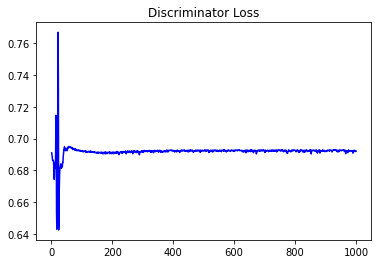

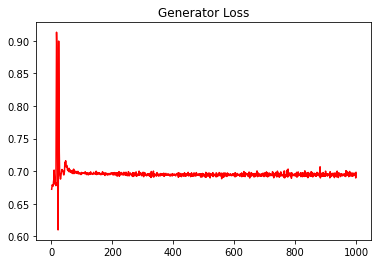

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2779133678782492


#### Sanity Checks 

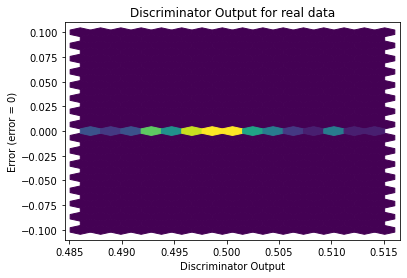

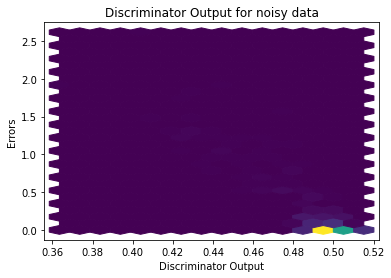

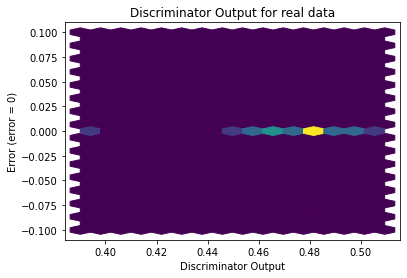

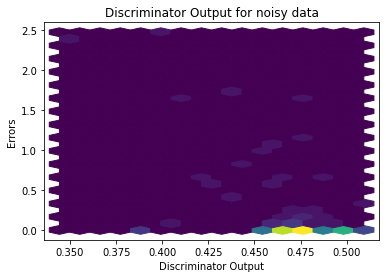

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


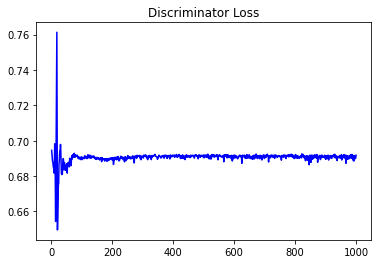

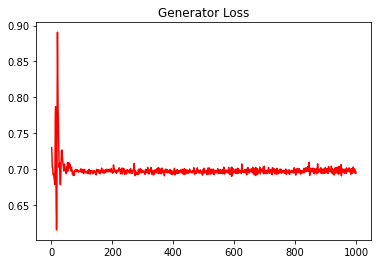

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21160865824113945


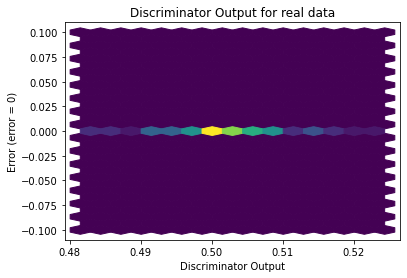

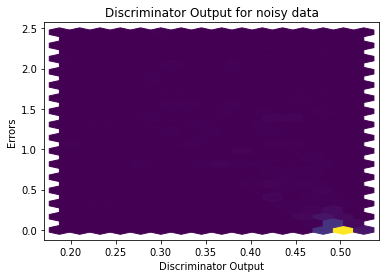

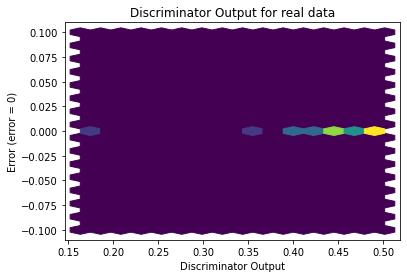

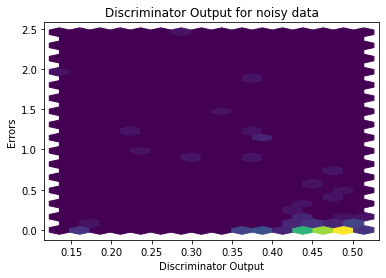

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7610]], device='cuda:0', requires_grad=True)
